In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("/content/Advertising.csv")

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 5)

In [7]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

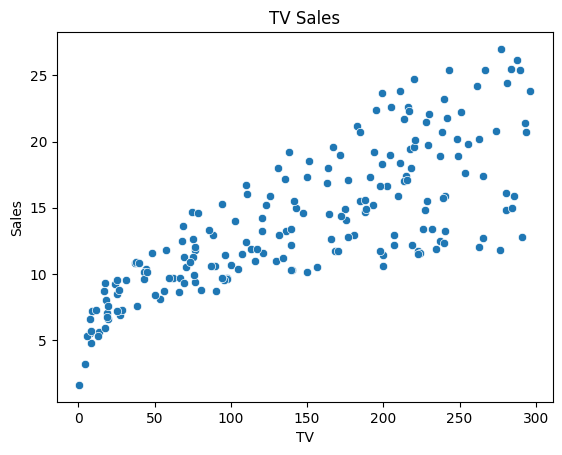

In [12]:
sns.scatterplot(x=df['TV'],y=df['Sales'])
plt.title("TV Sales")
plt.show()

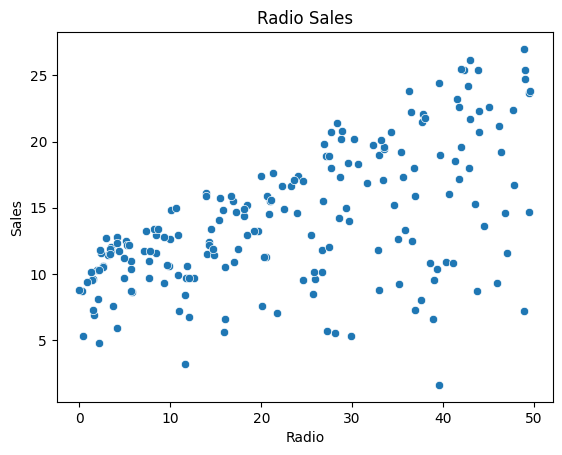

In [13]:
sns.scatterplot(x=df['Radio'],y=df['Sales'])
plt.title("Radio Sales")
plt.show()

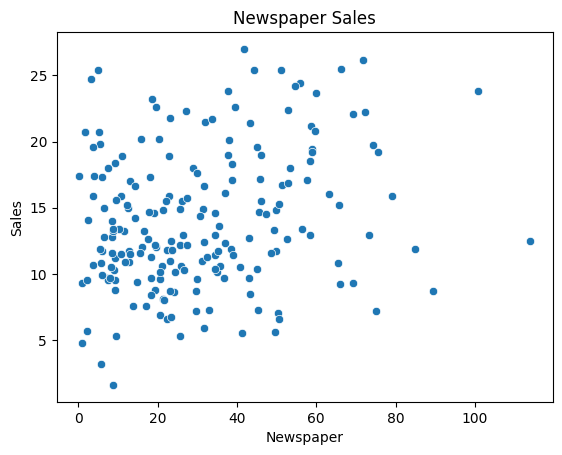

In [14]:
sns.scatterplot(x=df['Newspaper'],y=df['Sales'])
plt.title("Newspaper Sales")
plt.show()

# Splitting

In [15]:
X = df.drop(columns=['Sales'],axis=1)
Y = df['Sales']

In [40]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, Y_train, Y_test = tts(X,Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(134, 3) (66, 3) (134,) (66,)


# Model Training

In [41]:
from sklearn.metrics import r2_score as r2s

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,Y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Training Accuracy RSquared: ",r2s(Y_train,train_pred))
print("Testing Accuracy RSquared: ",r2s(Y_test,test_pred))

Training Accuracy RSquared:  0.9095216639030753
Testing Accuracy RSquared:  0.8555568430680086


In [43]:
from sklearn import svm

model = svm.SVR(kernel='linear')
model.fit(X_train,Y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Training Accuracy RSquared: ",r2s(Y_train,train_pred))
print("Testing Accuracy RSquared: ",r2s(Y_test,test_pred))

Training Accuracy RSquared:  0.9020019742901862
Testing Accuracy RSquared:  0.8322319454919381


In [44]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,Y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Training Accuracy RSquared: ",r2s(Y_train,train_pred))
print("Testing Accuracy RSquared: ",r2s(Y_test,test_pred))

Training Accuracy RSquared:  0.9962079410605326
Testing Accuracy RSquared:  0.9822484625281913


In [45]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train,Y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Training Accuracy RSquared: ",r2s(Y_train,train_pred))
print("Testing Accuracy RSquared: ",r2s(Y_test,test_pred))

Training Accuracy RSquared:  0.9999999220285487
Testing Accuracy RSquared:  0.9785346009263829
